# MULTIVARIATE CLASSIFICATION OF DRY BEAN SEEDS USING MACHINE LEARNING ALGORITHMS


Importing all necessary libraries


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from collections import Counter
import numpy as np
import pandas as pd
import math
from math import log

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import precision_score,accuracy_score,recall_score,confusion_matrix
from sklearn.metrics import classification_report

Downloading and viewing dataset


In [2]:
#loading the dataset for preparation and analysis
#preview of the dataset first 5 rows
Bean_data=pd.read_csv('/content/Dry_Bean.csv')
Bean_data.head()


Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER

Explaratory Data Analysis

here, the dataset is explored in detail by performing some basic analytic operations to understand the elements and variables and make necessary adjustments. this is necessary to help prepare the dataset to be in a suitable condition to produce accurate results.



In [3]:
#let's find out the number of rows and column of dataset
Bean_data.shape

(13611, 17)

The dataset originally consists of 13611 rows and 17 columns.

In [4]:
#let's take a look at the columns
Bean_data.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

In [5]:
# using the dtype function to determine the types of elements in all columns
Bean_data.dtypes

Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
dtype: object

From the output we can view that the predictive variable which is columns 'Area' through 'Shapefactor4' all have integer or float type contents while our target variable 'Class' is the only Object type column.

In [6]:
#checking for missing values and general info of the dataset
Bean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

From the output of the function .info() we can view the general info of the datasets including the datatypes in each column, the count of all values, total number of columns and Non null count.

In [7]:
#Investigating missing values by columns
Bean_data.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

the output confirms that there are no missing values as all columns have a value in all cells or rows.

In [8]:
# Finding out number of each class of bean in the Class column
Bean_data.Class.value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

the output of the class.value_count() command details the number of values in the class column(target variable) and number of instances of each value. we can see each seed type and how instances present in the dataset, the sum of all constitutes to 13611 values in the class column.

In [9]:
#Describe function gives us a statistical summary of the dataset.
Bean_data.describe()

Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13611.000000  13611.000000     13611.000000     13611.000000   
mean    53048.284549    855.283459       320.141867       202.270714   
std     29324.095717    214.289696        85.694186        44.970091   
min     20420.000000    524.736000       183.601165       122.512653   
25%     36328.000000    703.523500       253.303633       175.848170   
50%     44652.000000    794.941000       296.883367       192.431733   
75%     61332.000000    977.213000       376.495012       217.031741   
max    254616.000000   1985.370000       738.860154       460.198497   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  13611.000000  13611.000000   13611.000000   13611.000000  13611.000000   
mean       1.583242      0.750895   53768.200206     253.064220      0.749733   
std        0.246678      0.092002   29774.915817      59.177120      0.049086   
min        1.024868      0.218951   20684.000000     161.243764      0.555315   
25%        1.432307      0.715928   36714.500000     215.068003      0.718634   
50%        1.551124      0.764441   45178.000000     238.438026      0.759859   
75%        1.707109      0.810466   62294.000000     279.446467      0.786851   
max        2.430306      0.911423  263261.000000     569.374358      0.866195   

           Solidity     roundness   Compactness  ShapeFactor1  ShapeFactor2  \
count  13611.000000  13611.000000  13611.000000  13611.000000  13611.000000   
mean       0.987143      0.873282      0.799864      0.006564      0.001716   
std        0.004660      0.059520      0.061713      0.001128      0.000596   
min        0.919246      0.489618      0.640577      0.002778      0.000564   
25%        0.985670      0.832096      0.762469      0.005900      0.001154   
50%        0.988283      0.883157      0.801277      0.006645      0.001694   
75%        0.990013      0.916869      0.834270      0.007271      0.002170   
max        0.994677      0.990685      0.987303      0.010451      0.003665   

       ShapeFactor3  ShapeFactor4  
count  13611.000000  13611.000000  
mean       0.643590      0.995063  
std        0.098996      0.004366  
min        0.410339      0.947687  
25%        0.581359      0.993703  
50%        0.642044      0.996386  
75%        0.696006      0.997883  
max        0.974767      0.999733

In [10]:
#Checking shapes before dropping duplicates
Bean_data.shape

(13611, 17)

In [11]:
# Dropping duplicates from dataset
Bean_data.drop_duplicates(inplace=True)

In [12]:
#Reconfirm shape to check if duplicates are dropped
Bean_data.shape

(13543, 17)

we notice that the shape (rows) of the dataset has reduced as a result of the duplicates dropped from the dataset

In [13]:
# we check value counts again for class column to confirm dropped duplicates.
Bean_data.Class.value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1860
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

Not a very significant change but a slight change from the Bean class 'Horoz'

In [14]:
Bean_data.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER

In [15]:
Bean_data.describe().T

count          mean           std           min  \
Area             13543.0  53048.460385  29392.438324  20420.000000   
Perimeter        13543.0    854.993406    214.722684    524.736000   
MajorAxisLength  13543.0    319.895602     85.809260    183.601165   
MinorAxisLength  13543.0    202.365321     45.051632    122.512653   
AspectRation     13543.0      1.581075      0.245245      1.024868   
Eccentricity     13543.0      0.750315      0.091858      0.218951   
ConvexArea       13543.0  53767.986709  29844.248525  20684.000000   
EquivDiameter    13543.0    253.034094     59.307709    161.243764   
Extent           13543.0      0.749829      0.048939      0.555315   
Solidity         13543.0      0.987152      0.004650      0.919246   
roundness        13543.0      0.873671      0.059393      0.489618   
Compactness      13543.0      0.800352      0.061464      0.640577   
ShapeFactor1     13543.0      0.006561      0.001130      0.002778   
ShapeFactor2     13543.0      0.001719      0.000595      0.000564   
ShapeFactor3     13543.0      0.644341      0.098653      0.410339   
ShapeFactor4     13543.0      0.995078      0.004347      0.947687   

                          25%           50%           75%            max  
Area             36282.500000  44580.000000  61382.000000  254616.000000  
Perimeter          703.230000    793.896000    977.146500    1985.370000  
MajorAxisLength    253.086806    296.404589    376.312489     738.860154  
MinorAxisLength    175.886357    192.491117    217.245403     460.198497  
AspectRation         1.430662      1.549860      1.703916       2.430306  
Eccentricity         0.715144      0.763997      0.809671       0.911423  
ConvexArea       36673.000000  45122.000000  62360.000000  263261.000000  
EquivDiameter      214.933277    238.245711    279.560351     569.374358  
Extent               0.718735      0.759903      0.786849       0.866195  
Solidity             0.985678      0.988288      0.990019       0.994677  
roundness            0.833410      0.883490      0.917031       0.990685  
Compactness          0.763228      0.801514      0.834470       0.987303  
ShapeFactor1         0.005893      0.006643      0.007270       0.010451  
ShapeFactor2         0.001158      0.001700      0.002173       0.003665  
ShapeFactor3         0.582517      0.642424      0.696341       0.974767  
ShapeFactor4         0.993720      0.996393      0.997891       0.999733

From the both statistical summaries so far, we can identify that the Variables Area and ConvexArea are very distinct and has way higher values than the other variables, this will result to class imbalance and indicates that the feature variables will need to be scaled in order to predict more accurately when modelling algorithms are applied. but before scaling we do some more exploration to view class imbalance and correlation between variables.

VISUALIZATION OF THE CLASS COLUMN TO INVESTIGATE CLASS INBALANCE

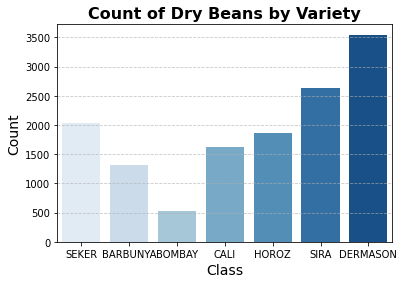

In [16]:
# Creating a countplot using the seaborn and matplotlib libraries
sns.countplot(x="Class", data=Bean_data, palette="Blues")

# Adding title, labels, and grid to the plot
plt.title("Count of Dry Beans by Variety", fontsize=16, fontweight='bold')
plt.xlabel("Class", fontsize=14)
plt.ylabel("Count", fontsize=14)
#sns.despine(left=True, bottom=True)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


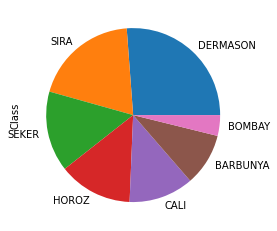

In [17]:
Bean_data.Class.value_counts().plot(kind='pie')

Both plots above show the frequency of distribution of each type of bean seed in the target variable. Dermason has the highest number of instances with 3546, while Bombay has the lowest number of instances with 522.

VISUALIZATION OF FEATURE VARIABLES.
we carry out some visualization practices to investigate the condition of the feature variables usually to determine if some features are skewed.

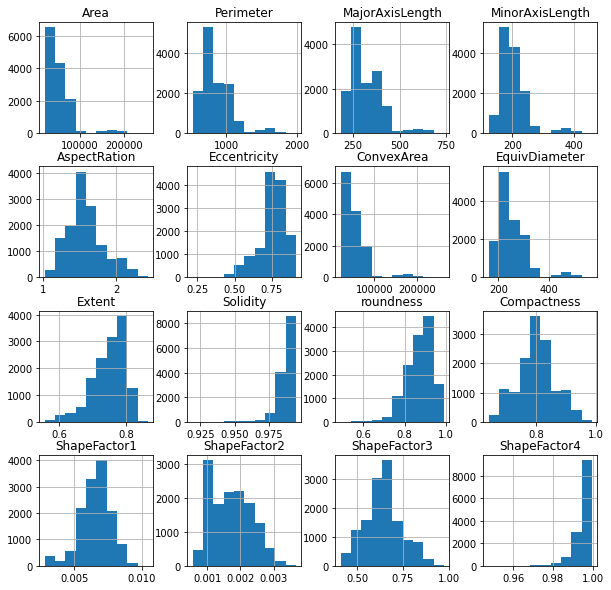

In [18]:
Bean_data.hist(bins=10, figsize= (10,10))
plt.show()

CONCLUSION FROM EXPLORING THE DATASET

From the details we have explored in the dataset we can see that the data in the outcome variable is inbalanced and will influence the accuracy of our prediction model if not balanced or normalised.this simply means that some predictive features have way higher or lower attributes or values than others. Also from the Histogram plot on the feature variables we determined that the dataset is skewed we would have to perform some balancing and scaling operations to normalize our dataset.

In [19]:
Bean_data.tail()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
13606  42097    759.696       288.721612       185.944705      1.552728   
13607  42101    757.499       281.576392       190.713136      1.476439   
13608  42139    759.321       281.539928       191.187979      1.472582   
13609  42147    763.779       283.382636       190.275731      1.489326   
13610  42159    772.237       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
13606      0.765002       42508     231.515799  0.714574  0.990331   0.916603   
13607      0.735702       42494     231.526798  0.799943  0.990752   0.922015   
13608      0.734065       42569     231.631261  0.729932  0.989899   0.918424   
13609      0.741055       42667     231.653247  0.705389  0.987813   0.907906   
13610      0.786693       42600     231.686223  0.788962  0.989648   0.888380   

       Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
13606     0.801865      0.006858      0.001749      0.642988      0.998385   
13607     0.822252      0.006688      0.001886      0.676099      0.998219   
13608     0.822730      0.006681      0.001888      0.676884      0.996767   
13609     0.817457      0.006724      0.001852      0.668237      0.995222   
13610     0.784997      0.007001      0.001640      0.616221      0.998180   

          Class  
13606  DERMASON  
13607  DERMASON  
13608  DERMASON  
13609  DERMASON  
13610  DERMASON

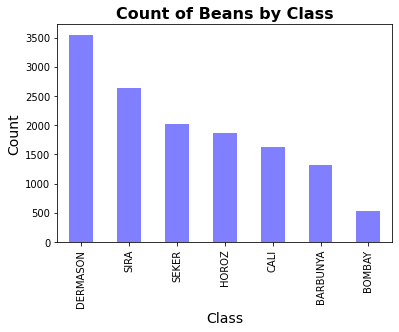

In [20]:
# Count the number of beans in each prediction class
bean_counts = Bean_data['Class'].value_counts()

# Plot the count of beans in each prediction class with a Barplot
bean_counts.plot (kind='bar', color='blue', alpha=0.5)

# Add a title and labels to the plot
plt.title("Count of Beans by Class", fontsize=16, fontweight='bold')
plt.xlabel("Class", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Show the plot
plt.show()


LABEL ENCODING

Because our target variable is a categorical variable and not a numerical variable, we have to encode the classes of bean in a numeric value. i.e convert each class to a number and identify it as that number.

In [21]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Extract the target variable (class) from the dataset
target = Bean_data['Class']

# Create a LabelEncoder object and fit it to the target variable
labencoder = LabelEncoder()
labencoder.fit(target)

# Transform the target variable into numerical labels
labels = labencoder.transform(target)

# Print the unique class labels and their corresponding numerical labels
for i, class_label in enumerate(labencoder.classes_):
    print(f'{class_label}: {i}')


BARBUNYA: 0
BOMBAY: 1
CALI: 2
DERMASON: 3
HOROZ: 4
SEKER: 5
SIRA: 6


In [22]:
#Bean_data.replace(['SIRA','BOMBAY','DERMASON', 'BARBUNYA', 'HOROZ', 'CALI', 'SEKER',], [1,2,3,4,5,6,7], inplace=True)

**CORRELATION ANALYSIS**
correlation analysis is a statistical technique used to determine whether or if there is a relationship between two variables or datasets and how strong that relationship might be.

Now, we will do some Correlation Analysis between the prediction variables and against the target variable to determine some dominant 
features and features with most predictive impact.

In [23]:
#compute correlation matrix
Corrstat = Bean_data.corr()
Corrstat

Area  Perimeter  MajorAxisLength  MinorAxisLength  \
Area             1.000000   0.966908         0.932623         0.952041   
Perimeter        0.966908   1.000000         0.977561         0.914336   
MajorAxisLength  0.932623   0.977561         1.000000         0.828360   
MinorAxisLength  0.952041   0.914336         0.828360         1.000000   
AspectRation     0.243698   0.386097         0.550075        -0.005354   
Eccentricity     0.268580   0.391062         0.541011         0.022391   
ConvexArea       0.999940   0.967871         0.933392         0.951780   
EquivDiameter    0.984998   0.991453         0.962271         0.949214   
Extent           0.054648  -0.020620        -0.077287         0.145906   
Solidity        -0.197333  -0.304662        -0.284857        -0.156819   
roundness       -0.359068  -0.548336        -0.595710        -0.214090   
Compactness     -0.269797  -0.407426        -0.567902        -0.018618   
ShapeFactor1    -0.848390  -0.865756        -0.775840        -0.947194   
ShapeFactor2    -0.641208  -0.768590        -0.859401        -0.475326   
ShapeFactor3    -0.273754  -0.408888        -0.567607        -0.022744   
ShapeFactor4    -0.358019  -0.431215        -0.484464        -0.266402   

                 AspectRation  Eccentricity  ConvexArea  EquivDiameter  \
Area                 0.243698      0.268580    0.999940       0.984998   
Perimeter            0.386097      0.391062    0.967871       0.991453   
MajorAxisLength      0.550075      0.541011    0.933392       0.962271   
MinorAxisLength     -0.005354      0.022391    0.951780       0.949214   
AspectRation         1.000000      0.924185    0.245267       0.305237   
Eccentricity         0.924185      1.000000    0.270350       0.319360   
ConvexArea           0.245267      0.270350    1.000000       0.985255   
EquivDiameter        0.305237      0.319360    0.985255       1.000000   
Extent              -0.371234     -0.319678    0.052864       0.028762   
Solidity            -0.269110     -0.298282   -0.206901      -0.232344   
roundness           -0.764975     -0.720138   -0.363620      -0.437189   
Compactness         -0.987644     -0.970308   -0.271651      -0.328980   
ShapeFactor1         0.020875      0.017266   -0.848382      -0.893403   
ShapeFactor2        -0.837338     -0.859246   -0.642773      -0.714693   
ShapeFactor3        -0.978528     -0.981058   -0.275631      -0.331594   
ShapeFactor4        -0.451598     -0.450611   -0.364302      -0.394693   

                   Extent  Solidity  roundness  Compactness  ShapeFactor1  \
Area             0.054648 -0.197333  -0.359068    -0.269797     -0.848390   
Perimeter       -0.020620 -0.304662  -0.548336    -0.407426     -0.865756   
MajorAxisLength -0.077287 -0.284857  -0.595710    -0.567902     -0.775840   
MinorAxisLength  0.145906 -0.156819  -0.214090    -0.018618     -0.947194   
AspectRation    -0.371234 -0.269110  -0.764975    -0.987644      0.020875   
Eccentricity    -0.319678 -0.298282  -0.720138    -0.970308      0.017266   
ConvexArea       0.052864 -0.206901  -0.363620    -0.271651     -0.848382   
EquivDiameter    0.028762 -0.232344  -0.437189    -0.328980     -0.893403   
Extent           1.000000  0.192268   0.344510     0.354912     -0.141525   
Solidity         0.192268  1.000000   0.609668     0.304802      0.154346   
roundness        0.344510  0.609668   1.000000     0.765995      0.234158   
Compactness      0.354912  0.304802   0.765995     1.000000     -0.005980   
ShapeFactor1    -0.141525  0.154346   0.234158    -0.005980      1.000000   
ShapeFactor2     0.237584  0.344337   0.781468     0.868347      0.473239   
ShapeFactor3     0.348226  0.308614   0.761012     0.998684     -0.005050   
ShapeFactor4     0.148622  0.700150   0.472776     0.486334      0.251164   

                 ShapeFactor2  ShapeFactor3  ShapeFactor4  
Area                -0.641208     -0.273754     -0.358019  
Perimeter           -0.768590     -0.408888     -0.431215  
MajorAxisLeng

Visualisation of correlation between feature variables

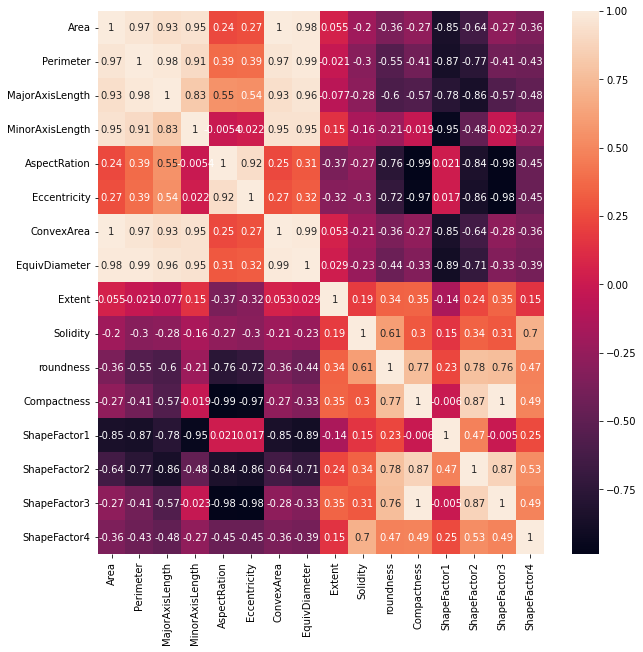

In [24]:
#heatmap of feature correlation
Corrstat = Bean_data.corr()
plt.figure(figsize = (10,10))
sns.heatmap(Bean_data.corr(),annot=True);



Features like 'Area','ConvexArea' and 'EquivDiameter' have very high multi colinearity. we have to preform a VIF test to determine if we need to eliminate any features.

In [25]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
  

# Specify the name of the target variable (y) and the feature variables (X)
y = Bean_data['Class']
X = Bean_data.drop("Class",axis= 1)

# Calculate VIF for each feature variable
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the results
print(vif)


           Features    VIF Factor
0              Area  3.443408e+05
1         Perimeter  6.021611e+04
2   MajorAxisLength  1.317358e+06
3   MinorAxisLength  1.652831e+06
4      AspectRation  1.682818e+05
5      Eccentricity  2.341323e+04
6        ConvexArea  3.321269e+05
7     EquivDiameter  6.100438e+06
8            Extent  2.933328e+02
9          Solidity  6.280426e+05
10        roundness  2.245572e+04
11      Compactness  2.580923e+06
12     ShapeFactor1  2.091561e+04
13     ShapeFactor2  1.151163e+04
14     ShapeFactor3  5.617843e+05
15     ShapeFactor4  3.107614e+06


I eliminate the features with the highest value just for a better correlation understanding, not taking completely out of my analysis.

VISUALIZATION OF OUTLIERS

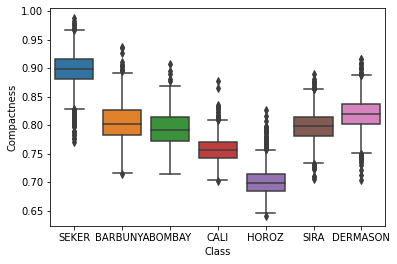

In [26]:
sns.boxplot(x=Bean_data.Class,y=Bean_data.Compactness)

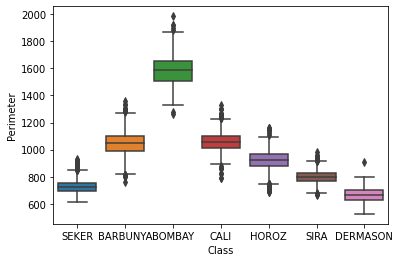

In [27]:
sns.boxplot(x=Bean_data.Class,y=Bean_data.Perimeter)

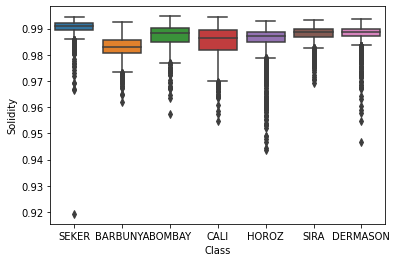

In [28]:
sns.boxplot(x=Bean_data.Class,y=Bean_data.Solidity)

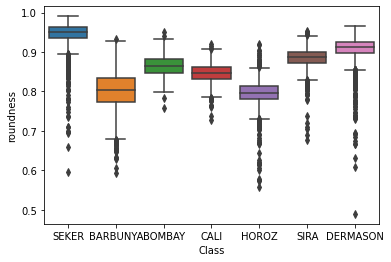

In [29]:
sns.boxplot(x=Bean_data.Class,y=Bean_data.roundness)

In [30]:
# dropping 4 feature variables for a better correlation understanding
Bean_datadup = Bean_data.drop(columns=['Perimeter', 'EquivDiameter','Solidity','ShapeFactor3'])

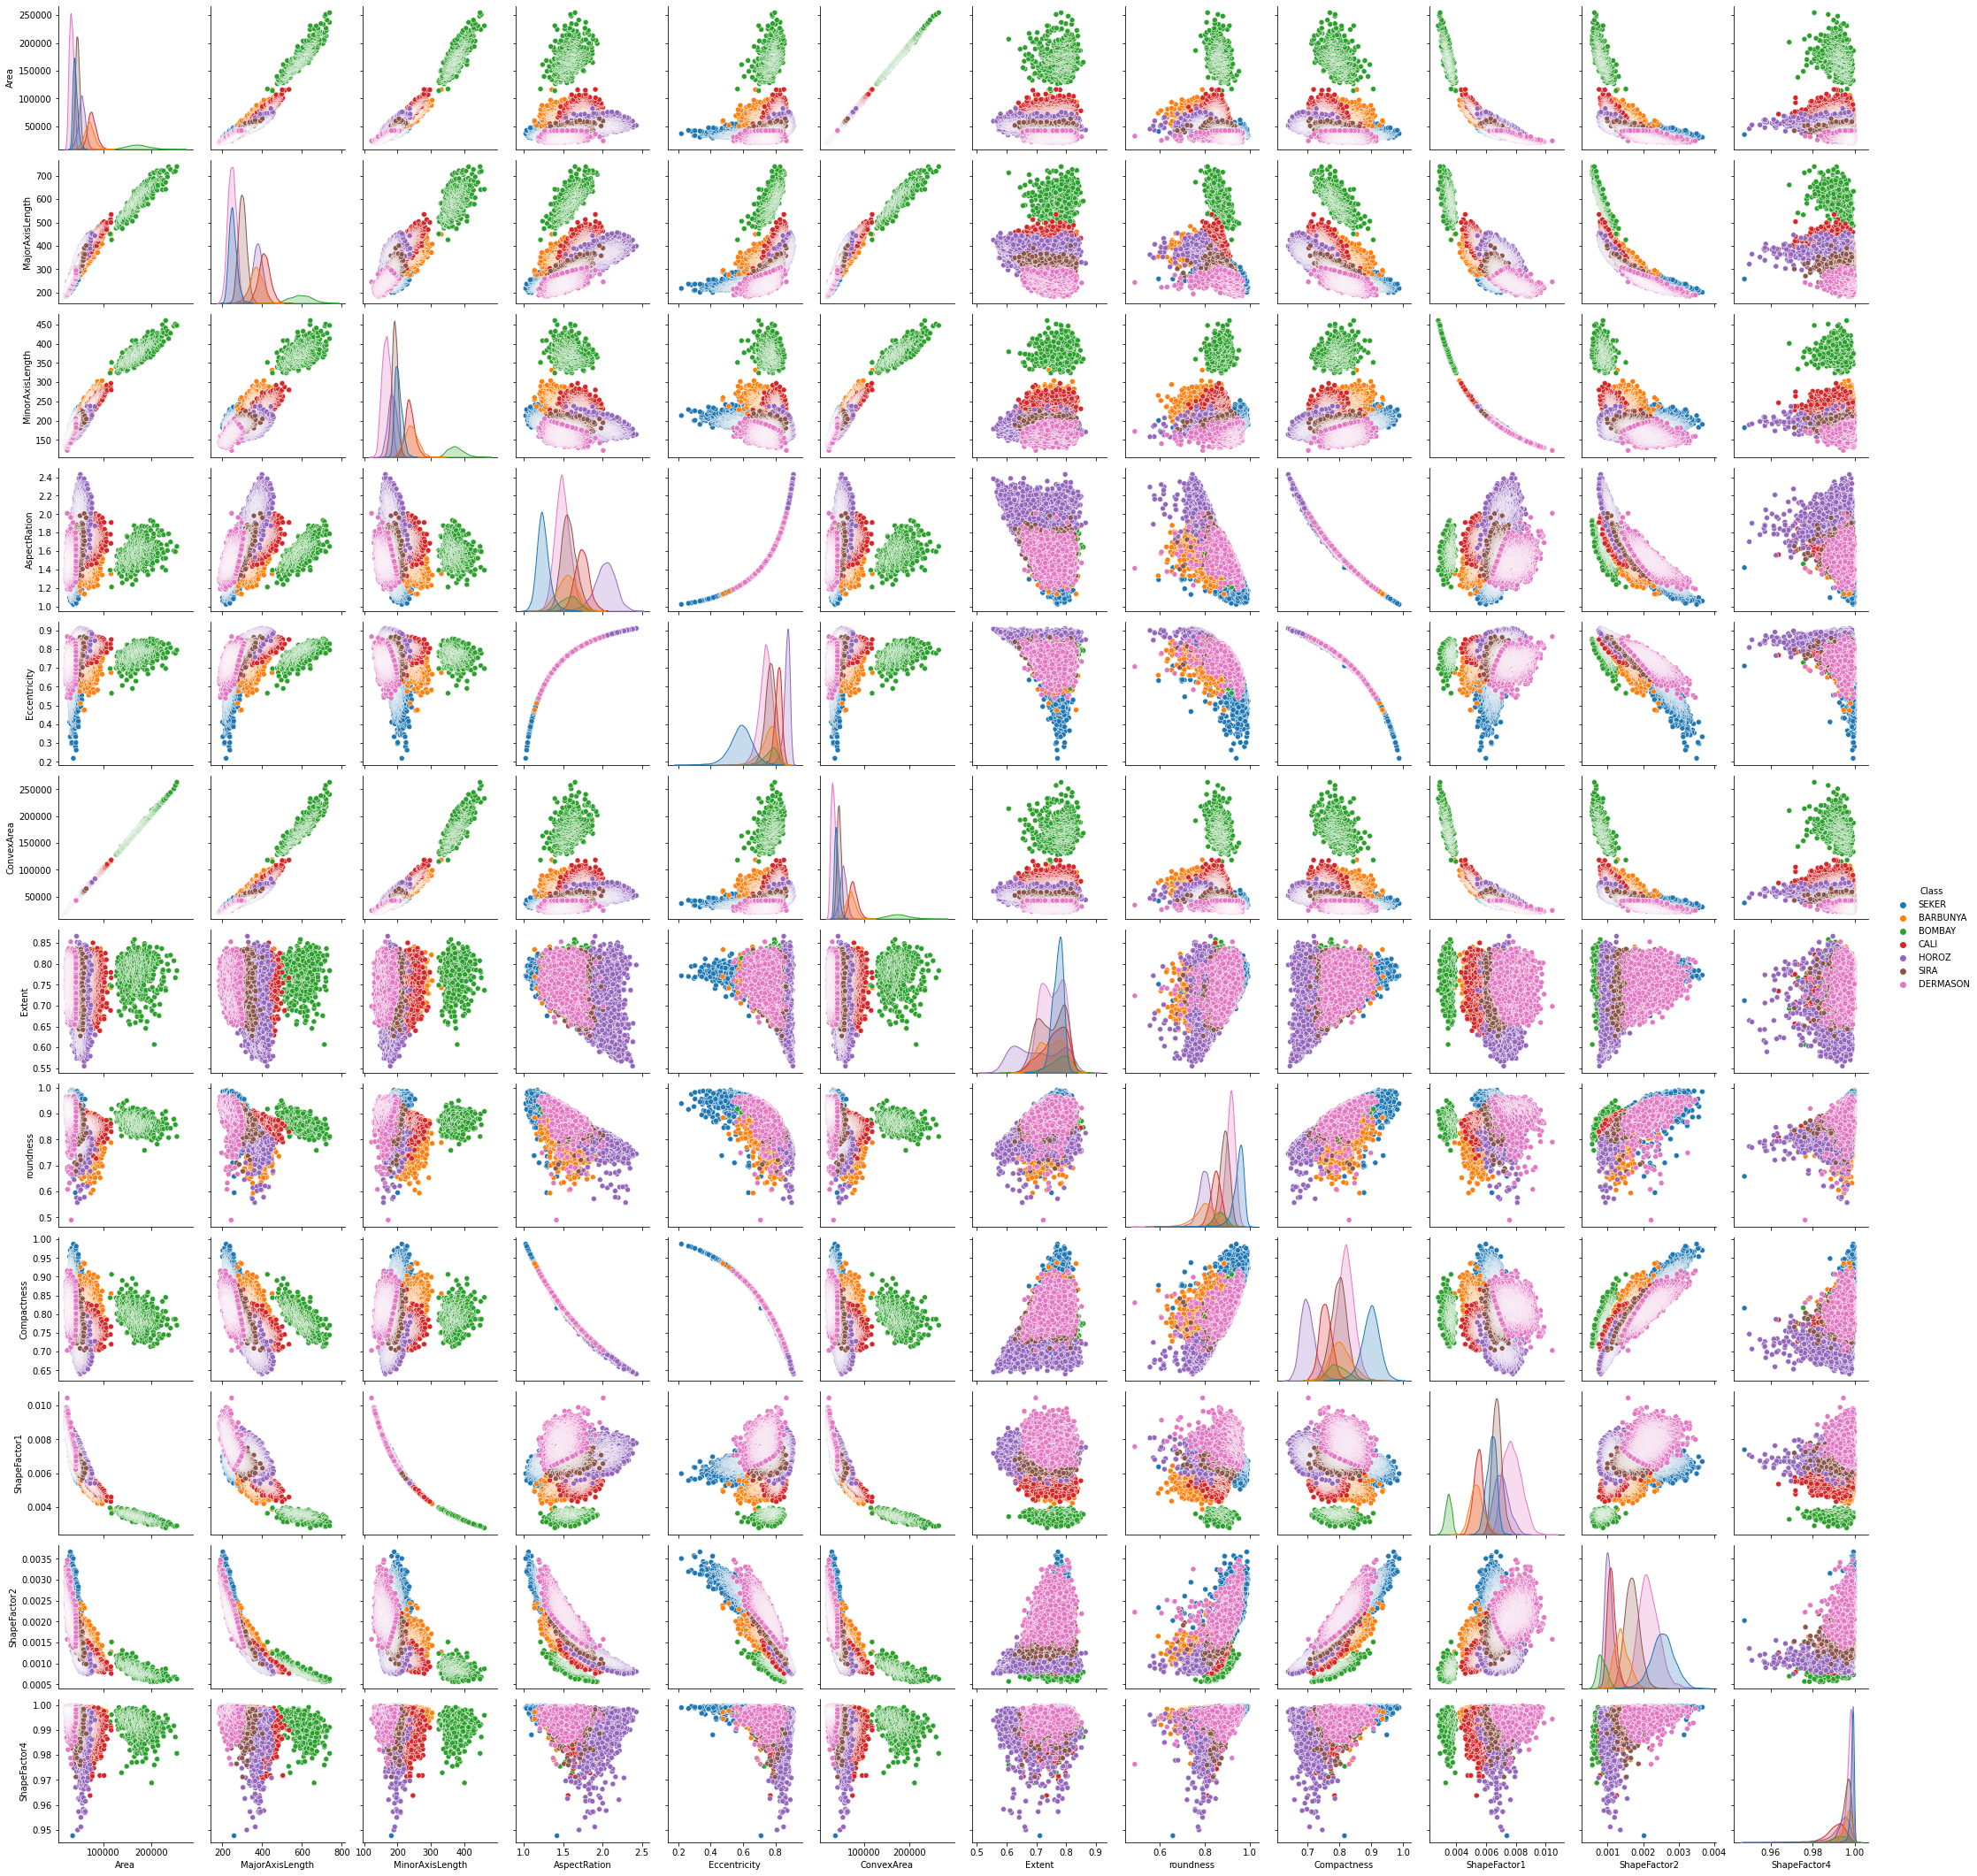

In [31]:
sns.pairplot(data = Bean_datadup, hue = 'Class')
plt.show()

from the pairplot we can establish that all features has a positive correlation with class, some features have positive correlation among themselves.

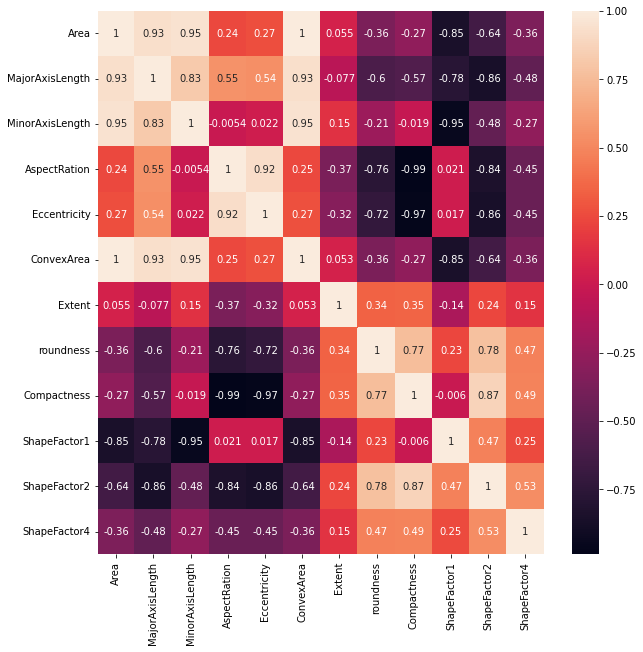

In [32]:
Corrstat = Bean_datadup.corr()
plt.figure(figsize = (10,10))
sns.heatmap(Bean_datadup.corr(),annot=True);

FEATURE SCALING AND FIXING CLASS INBALANCE

In [33]:
Bean_data.shape

(13543, 17)

In [34]:
# separating the target variable from feature variables
F_variables = []
for feature in Bean_data.columns:
    if feature != 'Class':
        F_variables.append(feature)
X = Bean_data[F_variables]
y = Bean_data['Class']


we split the data into two parts for training and testing respectively
70% of data is trained and 30% of data will be used for testing.

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=70) 


FEATURE SCALING. we scale the feature variables using the standard scaler to help normalise the dataset for optimised result.

In [36]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# create a StandardScaler object
scaler = StandardScaler()

# fit the scaler to Feautre data
scaler.fit(X_train)

# transform the data using the scaler
scaled_data = scaler.transform(X_test)


Using only the training data we visualise the number of samples for each class of bean

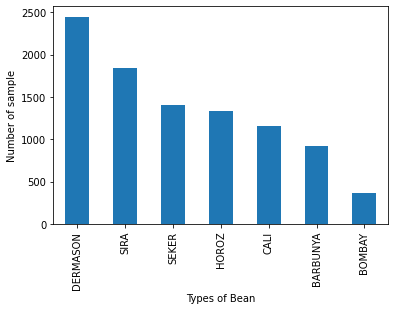

In [37]:
import matplotlib.pyplot as plt
count = y_train.value_counts()
count.plot.bar()
plt.ylabel('Number of sample')
plt.xlabel('Types of Bean')
plt.show()


We still have an imbalanced model more on the (majority) class, we have to apply the undersampling and oversampling technique to try and normalise the data. but first I will try to apply one or two models to denote the results before and after balancing of the dataset.

KNN MODEL UNBALANCED

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# create a k-nearest neighbors classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# fit the classifier to the training data
knn.fit(X_train, y_train)

# make predictions on the testing data
y_pred = knn.predict(X_test)

# evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.73


In [39]:
KNN_report = classification_report(y_test, y_pred)
print(KNN_report)

              precision    recall  f1-score   support

    BARBUNYA       0.48      0.54      0.50       400
      BOMBAY       1.00      1.00      1.00       156
        CALI       0.64      0.61      0.63       479
    DERMASON       0.80      0.90      0.85      1100
       HOROZ       0.75      0.67      0.71       522
       SEKER       0.81      0.61      0.69       617
        SIRA       0.71      0.75      0.73       789

    accuracy                           0.73      4063
   macro avg       0.74      0.73      0.73      4063
weighted avg       0.73      0.73      0.73      4063



NAIVE BAYESIAN UNBALANCED

In [40]:
cla = GaussianNB()
cla.fit(X_train, y_train)

GaussianNB()

In [41]:
y_pred = cla.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.77


In [42]:
NVB_report = classification_report(y_test, y_pred)
print(NVB_report)

              precision    recall  f1-score   support

    BARBUNYA       0.68      0.47      0.55       400
      BOMBAY       0.99      1.00      1.00       156
        CALI       0.68      0.81      0.74       479
    DERMASON       0.87      0.85      0.86      1100
       HOROZ       0.77      0.79      0.78       522
       SEKER       0.70      0.72      0.71       617
        SIRA       0.77      0.79      0.78       789

    accuracy                           0.77      4063
   macro avg       0.78      0.77      0.77      4063
weighted avg       0.77      0.77      0.77      4063



In [43]:
#installation of sci-kit metrics
!pip install scikit-plot


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


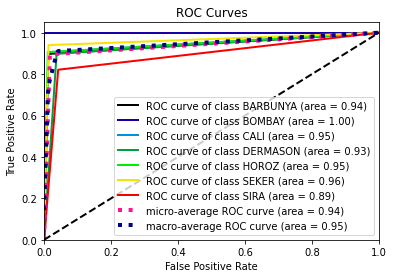

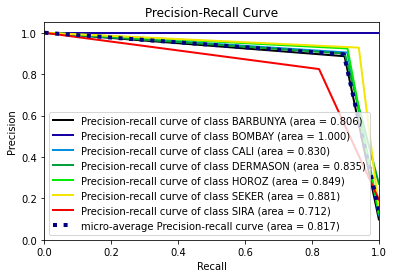

Accuracy: 0.90


In [44]:
import scikitplot.metrics as skplt
from sklearn.tree import DecisionTreeClassifier
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_score = model.predict_proba(X_test)
y_pred = model.predict(X_test)

# Plot metrics 
plot_roc(y_test, y_score)
plt.show()
    
plot_precision_recall(y_test, y_score)
plt.show()
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Removing Outliers 
By creating a range in which i want my dataset to remain i create a threshhold and consider the majority class a class with a number of samples greater than the threshold. Similarly, a minority class is a class with a number of samples less than the threshold. i set my threshhold to the median value of the number of samples in class variable. this is a manual application of the IQR process.

***

In [45]:
import numpy as np
threshhold = count.median().astype(np.int64)
threshhold

1338

In [46]:
import warnings
warnings.filterwarnings('ignore')

In [47]:
def Pipeline_strategy(X,y,threshhold, t='majority'):
    '''Create a sampling strategy for Undersampling and Oversampling'''
    Bean_classes = ''
    if t == 'majority':
        Bean_classes = y.value_counts() > threshhold
    elif t == 'minority':
       Bean_classes = y.value_counts() < threshhold
    Bc = Bean_classes[Bean_classes == True].index
    #Bean_classes_all = y.value_counts().index
    Pipeline_strategy = {}
    for Bean in Bc:
        Pipeline_strategy[Bean] = threshhold
    return Pipeline_strategy

Undersampling of majority class

In [48]:
from imblearn.under_sampling import ClusterCentroids
under_sampler = ClusterCentroids(sampling_strategy=Pipeline_strategy(X_train,y_train,threshhold,t='majority'))
X_under, y_under = under_sampler.fit_resample(X_train, y_train)

The countplot shows undersampled class, however some classes are still undersampled and will need to be oversampled to balance class variable.

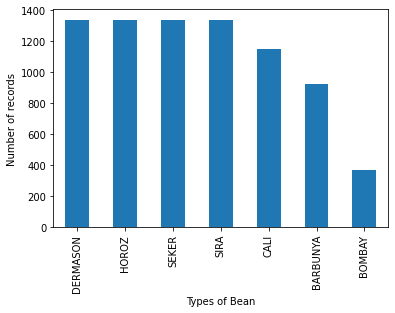

In [49]:
#Undersampled class
count = y_under.value_counts()
count.plot.bar()
plt.ylabel('Number of records')
plt.xlabel('Types of Bean')
plt.show()

Using SMOTE oversampling technique to balance rest of variables.

In [50]:
from imblearn.over_sampling import SMOTE
over_sampler = SMOTE(sampling_strategy=Pipeline_strategy(X_under, y_under,threshhold, t='minority'),k_neighbors=3)
X_bal, y_bal = over_sampler.fit_resample(X_under, y_under)

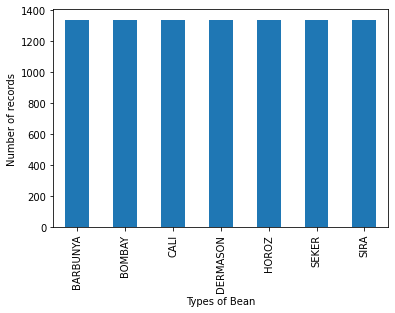

In [51]:
count = y_bal.value_counts()
count.plot.bar()
plt.ylabel('Number of records')
plt.xlabel('Types of Bean')
plt.show()

Now we finally have a balanced Class dataset.

APPLICATION OF MODEL ALGORITHMS

KNEAREST NEIGHBOUR (KNN)

In [52]:
# create a k-nearest neighbors classifier with k=3
clf_knn = KNeighborsClassifier(n_neighbors=5, metric= 'euclidean', p=2)

# fit the classifier to the training data
clf_knn.fit(X_bal, y_bal)

# make predictions on the testing data
y_pred = clf_knn.predict(X_test)

# evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'KNN Accuracy: {accuracy:.2f}')


KNN Accuracy: 0.71


In [53]:
KNN_report = classification_report(y_test, y_pred)
print(KNN_report)

              precision    recall  f1-score   support

    BARBUNYA       0.47      0.56      0.51       400
      BOMBAY       0.99      1.00      1.00       156
        CALI       0.63      0.58      0.60       479
    DERMASON       0.81      0.86      0.84      1100
       HOROZ       0.70      0.64      0.67       522
       SEKER       0.70      0.68      0.69       617
        SIRA       0.70      0.67      0.69       789

    accuracy                           0.71      4063
   macro avg       0.72      0.71      0.71      4063
weighted avg       0.71      0.71      0.71      4063



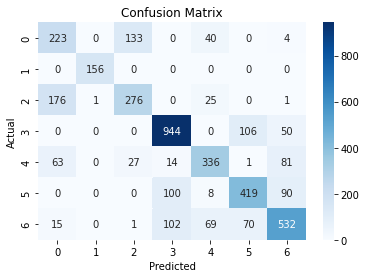

In [54]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create the confusion matrix
con_matKNN=confusion_matrix(y_test,y_pred)
# Plot the confusion matrix as a heatmap
sns.heatmap(con_matKNN, annot=True, cmap="Blues", fmt="d")

# Set the axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()



In [55]:
Analysis = pd.DataFrame(['knn'],columns=['Algorithm'])

Analysis.loc[0,'Precision']=metrics.precision_score(y_test, y_pred, average='micro')
Analysis.loc[0,'Recall']=metrics.recall_score(y_test, y_pred, average='micro')
Analysis.loc[0,'F1 Score']=metrics.f1_score(y_test, y_pred, average='micro')
Analysis.loc[0,'Accuracy']=metrics.accuracy_score(y_test,y_pred)

print(Analysis)

  Algorithm  Precision    Recall  F1 Score  Accuracy
0       knn   0.710313  0.710313  0.710313  0.710313


SUPPORT VECTOR CLASSIFIER (SVC)

RBF FUNCTION

In [56]:
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_bal, y_bal)
classifier.score(X_test,y_test)


0.6293379276396751

In [57]:
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.63


In [58]:
SVC_report = classification_report(y_test, y_pred)
print(SVC_report)

              precision    recall  f1-score   support

    BARBUNYA       0.43      0.28      0.33       400
      BOMBAY       1.00      1.00      1.00       156
        CALI       0.62      0.76      0.69       479
    DERMASON       0.86      0.77      0.81      1100
       HOROZ       0.58      0.61      0.59       522
       SEKER       0.40      0.56      0.47       617
        SIRA       0.62      0.53      0.58       789

    accuracy                           0.63      4063
   macro avg       0.64      0.64      0.64      4063
weighted avg       0.64      0.63      0.63      4063



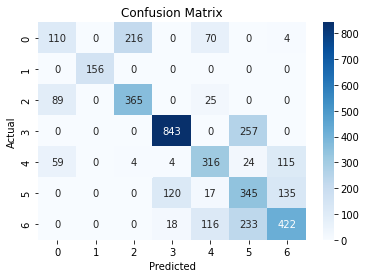

In [59]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create the confusion matrix
con_matSVC=confusion_matrix(y_test,y_pred)
# Plot the confusion matrix as a heatmap
sns.heatmap(con_matSVC, annot=True, cmap="Blues", fmt="d")

# Set the axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()





In [60]:
Analysis.loc[1,'Algorithm']='SVC'
Analysis.loc[1,'Precision']=metrics.precision_score(y_test, y_pred, average='micro')
Analysis.loc[1,'Recall']=metrics.recall_score(y_test, y_pred, average='micro')
Analysis.loc[1,'F1 Score']=metrics.f1_score(y_test, y_pred, average='micro')
Analysis.loc[1,'Accuracy']=metrics.accuracy_score(y_test,y_pred)

print(Analysis)

  Algorithm  Precision    Recall  F1 Score  Accuracy
0       knn   0.710313  0.710313  0.710313  0.710313
1       SVC   0.629338  0.629338  0.629338  0.629338


NAIVE BAYES (GaussianNB)

In [61]:
cla = GaussianNB()
cla.fit(X_bal, y_bal)

GaussianNB()

In [62]:
y_pred = cla.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'NB Accuracy: {accuracy:.2f}')

NB Accuracy: 0.77


In [63]:
NVB_report = classification_report(y_test, y_pred)
print(NVB_report)

              precision    recall  f1-score   support

    BARBUNYA       0.67      0.49      0.57       400
      BOMBAY       0.99      1.00      1.00       156
        CALI       0.69      0.80      0.74       479
    DERMASON       0.87      0.84      0.86      1100
       HOROZ       0.78      0.79      0.78       522
       SEKER       0.67      0.74      0.71       617
        SIRA       0.77      0.77      0.77       789

    accuracy                           0.77      4063
   macro avg       0.78      0.78      0.77      4063
weighted avg       0.77      0.77      0.77      4063



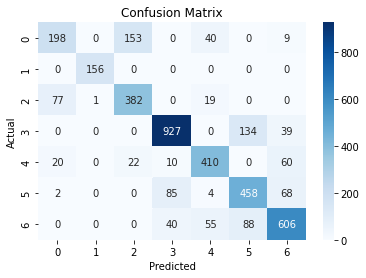

In [64]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create the confusion matrix
CON_matNVB=confusion_matrix(y_test,y_pred)
# Plot the confusion matrix as a heatmap
sns.heatmap(CON_matNVB, annot=True, cmap="Blues", fmt="d")

# Set the axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [65]:
Analysis.loc[2,'Algorithm'] = 'NVB'
Analysis.loc[2,'Precision']=metrics.precision_score(y_test, y_pred, average='micro')
Analysis.loc[2,'Recall']=metrics.recall_score(y_test, y_pred, average='micro')
Analysis.loc[2,'F1 Score']=metrics.f1_score(y_test, y_pred, average='micro')
Analysis.loc[2,'Accuracy']=metrics.accuracy_score(y_test,y_pred)

print(Analysis)

  Algorithm  Precision    Recall  F1 Score  Accuracy
0       knn   0.710313  0.710313  0.710313  0.710313
1       SVC   0.629338  0.629338  0.629338  0.629338
2       NVB   0.772090  0.772090  0.772090  0.772090


DECISION TREE CLASSIFIER 

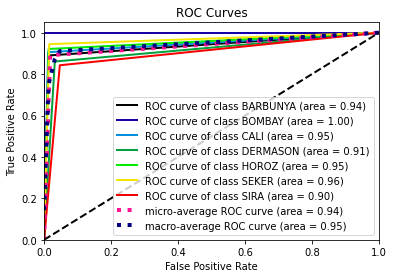

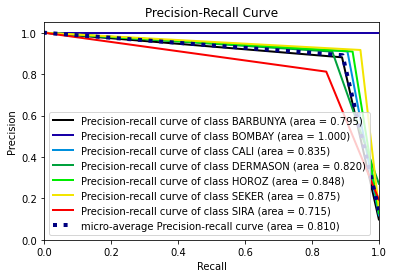

DT Accuracy: 0.89


In [66]:
model = DecisionTreeClassifier()
model.fit(X_bal, y_bal)
y_score = model.predict_proba(X_test)
y_pred = model.predict(X_test)

# plotting roc and precision-recall curves.
plot_roc(y_test, y_score)
plt.show()
    
plot_precision_recall(y_test, y_score)
plt.show()
accuracy = accuracy_score(y_test, y_pred)
print(f'DT Accuracy: {accuracy:.2f}')

In [67]:
DT_report = classification_report(y_test, y_pred)
print(DT_report)

              precision    recall  f1-score   support

    BARBUNYA       0.88      0.89      0.89       400
      BOMBAY       1.00      1.00      1.00       156
        CALI       0.91      0.91      0.91       479
    DERMASON       0.91      0.86      0.88      1100
       HOROZ       0.91      0.92      0.92       522
       SEKER       0.92      0.94      0.93       617
        SIRA       0.81      0.84      0.83       789

    accuracy                           0.89      4063
   macro avg       0.91      0.91      0.91      4063
weighted avg       0.89      0.89      0.89      4063



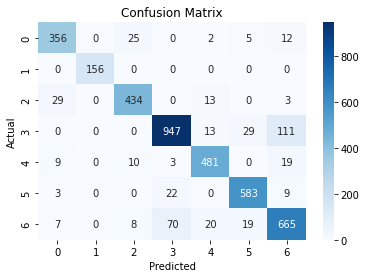

In [68]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create the confusion matrix
CON_matDT=confusion_matrix(y_test,y_pred)
# Plot the confusion matrix as a heatmap
sns.heatmap(CON_matDT, annot=True, cmap="Blues", fmt="d")

# Set the axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


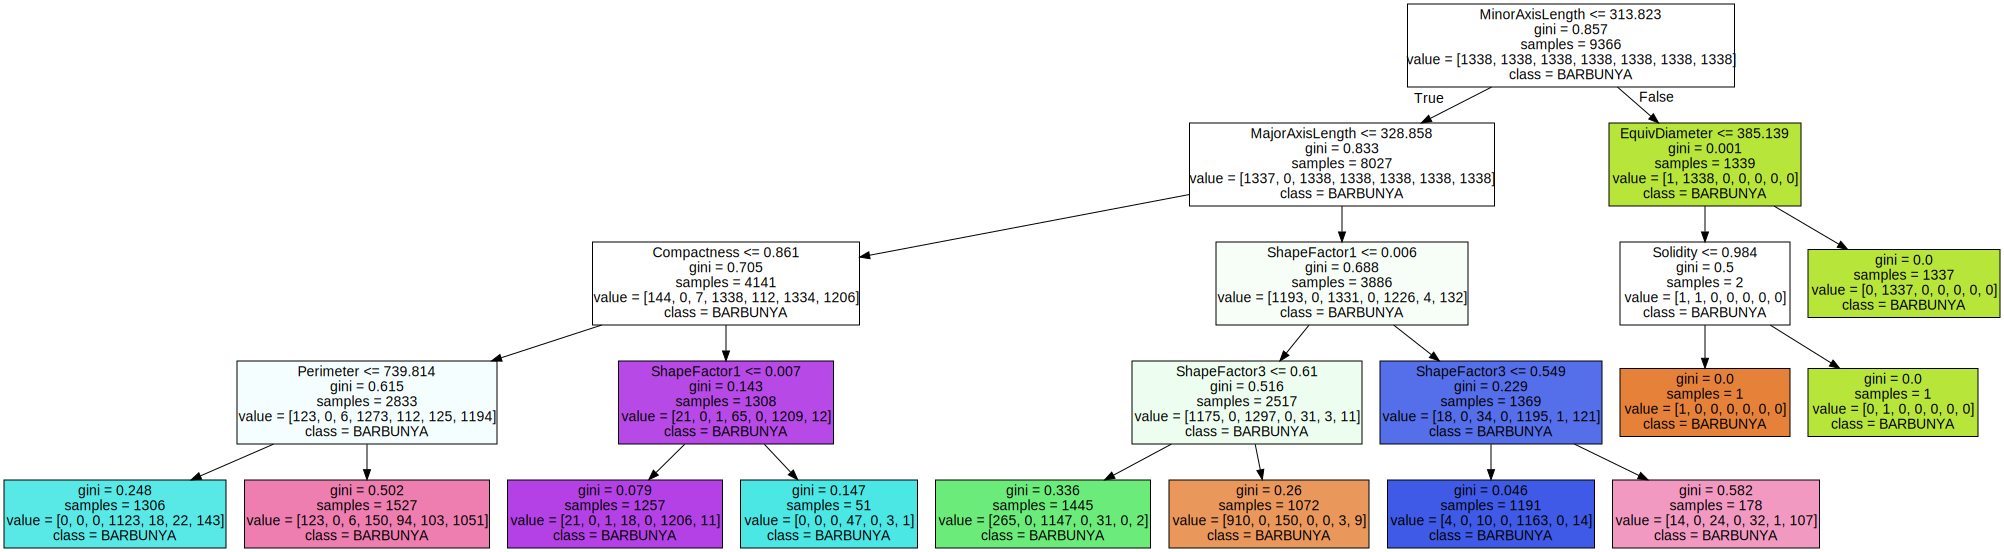

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.tree import export_graphviz
import graphviz


# Create a decision tree classifier with max depth 4
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X_bal, y_bal)

# Export the tree as a dot file
export_graphviz(tree, out_file="tree.dot", feature_names=F_variables, class_names=y_bal, filled=True)

# Visualize the tree using graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)


In [70]:
Analysis.loc[3,'Algorithm']='Decision Tree'
Analysis.loc[3,'Precision']=metrics.precision_score(y_test, y_pred, average='micro')
Analysis.loc[3,'Recall']=metrics.recall_score(y_test, y_pred, average='micro')
Analysis.loc[3,'F1 Score']=metrics.f1_score(y_test, y_pred, average='micro')
Analysis.loc[3,'Accuracy']=metrics.accuracy_score(y_test,y_pred)

print(Analysis)

       Algorithm  Precision    Recall  F1 Score  Accuracy
0            knn   0.710313  0.710313  0.710313  0.710313
1            SVC   0.629338  0.629338  0.629338  0.629338
2            NVB   0.772090  0.772090  0.772090  0.772090
3  Decision Tree   0.891460  0.891460  0.891460  0.891460


LOGISTIC REGRESSION (LR)

In [71]:
regressor=LogisticRegression(random_state=0)
regressor.fit(X_bal,y_bal)
y_pred = regressor.predict(X_test)
regressor.score(X_test,y_test)

0.7002215111986217

In [72]:
LREG_report = classification_report(y_test, y_pred)
print(LREG_report)

              precision    recall  f1-score   support

    BARBUNYA       0.62      0.63      0.63       400
      BOMBAY       0.96      0.99      0.97       156
        CALI       0.76      0.69      0.72       479
    DERMASON       0.87      0.83      0.85      1100
       HOROZ       0.55      0.60      0.58       522
       SEKER       0.62      0.74      0.67       617
        SIRA       0.61      0.54      0.57       789

    accuracy                           0.70      4063
   macro avg       0.71      0.72      0.71      4063
weighted avg       0.71      0.70      0.70      4063



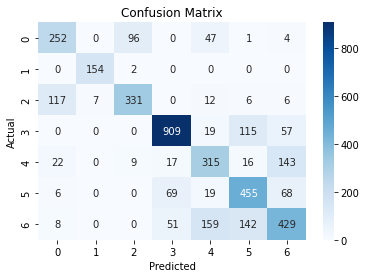

In [73]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create the confusion matrix
CON_matLREG=confusion_matrix(y_test,y_pred)
# Plot the confusion matrix as a heatmap
sns.heatmap(CON_matLREG, annot=True, cmap="Blues", fmt="d")

# Set the axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [74]:
Analysis.loc[4,'Algorithm']='Log Regression'
Analysis.loc[4,'Precision']=metrics.precision_score(y_test, y_pred, average='micro')
Analysis.loc[4,'Recall']=metrics.recall_score(y_test, y_pred, average='micro')
Analysis.loc[4,'F1 Score']=metrics.f1_score(y_test, y_pred, average='micro')
Analysis.loc[4,'Accuracy']=metrics.accuracy_score(y_test,y_pred)

print(Analysis)

        Algorithm  Precision    Recall  F1 Score  Accuracy
0             knn   0.710313  0.710313  0.710313  0.710313
1             SVC   0.629338  0.629338  0.629338  0.629338
2             NVB   0.772090  0.772090  0.772090  0.772090
3   Decision Tree   0.891460  0.891460  0.891460  0.891460
4  Log Regression   0.700222  0.700222  0.700222  0.700222


Visual representation of model performance according to Evaluation parameters.

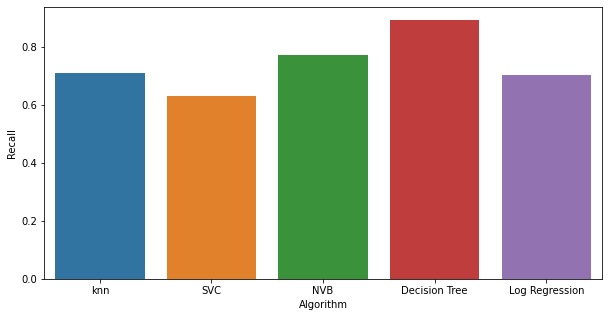

In [75]:
plt.figure(figsize=(10,5))
sns.barplot(x='Algorithm',y='Recall',data=Analysis)

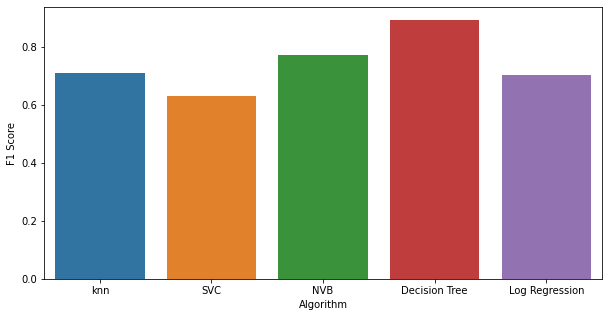

In [76]:
plt.figure(figsize=(10,5))
sns.barplot(x='Algorithm',y='F1 Score',data=Analysis)

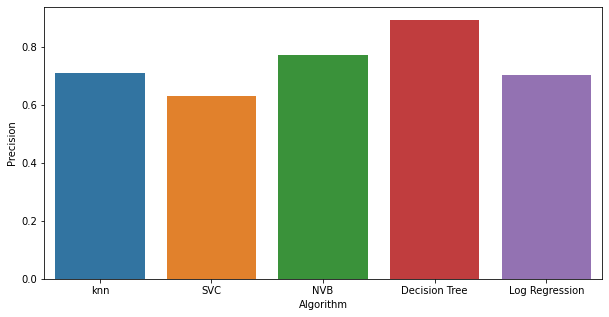

In [77]:
plt.figure(figsize=(10,5))
sns.barplot(x='Algorithm',y='Precision',data=Analysis)

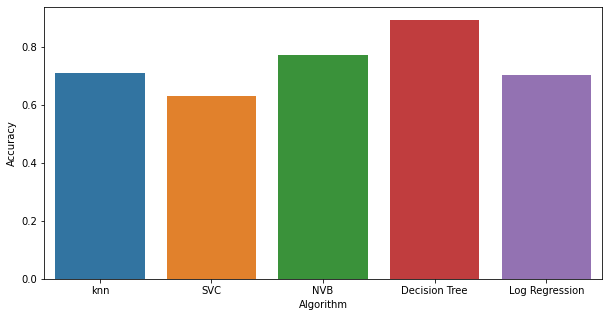

In [78]:
plt.figure(figsize=(10,5))
sns.barplot(x='Algorithm',y='Accuracy',data=Analysis)

In [79]:
Analysis[Analysis.Recall==Analysis.Recall.min()]

Algorithm  Precision    Recall  F1 Score  Accuracy
1       SVC   0.629338  0.629338  0.629338  0.629338

In [80]:
Analysis[Analysis.Recall==Analysis.Recall.max()]

Algorithm  Precision   Recall  F1 Score  Accuracy
3  Decision Tree    0.89146  0.89146   0.89146   0.89146

In [81]:
Analysis[Analysis.Recall==Analysis.Precision.min()]

Algorithm  Precision    Recall  F1 Score  Accuracy
1       SVC   0.629338  0.629338  0.629338  0.629338

In [82]:
Analysis[Analysis.Recall==Analysis.Precision.max()]

Algorithm  Precision   Recall  F1 Score  Accuracy
3  Decision Tree    0.89146  0.89146   0.89146   0.89146

In [83]:
Analysis[Analysis.Recall==Analysis.Accuracy.min()]

Algorithm  Precision    Recall  F1 Score  Accuracy
1       SVC   0.629338  0.629338  0.629338  0.629338

In [84]:
Analysis[Analysis.Recall==Analysis.Accuracy.max()]

Algorithm  Precision   Recall  F1 Score  Accuracy
3  Decision Tree    0.89146  0.89146   0.89146   0.89146

In [85]:
Analysis

Algorithm  Precision    Recall  F1 Score  Accuracy
0             knn   0.710313  0.710313  0.710313  0.710313
1             SVC   0.629338  0.629338  0.629338  0.629338
2             NVB   0.772090  0.772090  0.772090  0.772090
3   Decision Tree   0.891460  0.891460  0.891460  0.891460
4  Log Regression   0.700222  0.700222  0.700222  0.700222